## 決策樹

### 讀取iris 資料

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [10]:
iris.data[0:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [12]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 建立決策樹模型

In [14]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [25]:
? tree.DecisionTreeClassifier()

In [16]:
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 產生預測結果

In [17]:
predicted = clf.predict(iris.data)

In [18]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 做單筆資料預測

In [19]:
import numpy as np
s = np.array([[5,3,1.5,0.5]])
clf.predict(s)

array([0])

### 驗證準確度

In [23]:
sum(iris.target == predicted) / len(predicted)

1.0

### 匯出決策過程

In [24]:
tree.export_graphviz(clf, out_file='tree.dot')

### 使用webgraphviz 做視覺化
- http://www.webgraphviz.com/

### 限制深度

In [26]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
predicted = clf.predict(iris.data)

In [28]:
sum(iris.target == predicted) / len(predicted)

0.96

In [29]:
tree.export_graphviz(clf, out_file='tree2.dot')

## 繪製決策邊界

In [53]:
X = iris.data[:,[2,3]]
y = iris.target

In [54]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
tree.export_graphviz(clf, out_file='tree3.dot')

In [56]:
import matplotlib.pyplot as plt
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))

In [57]:
plt.plot()
Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

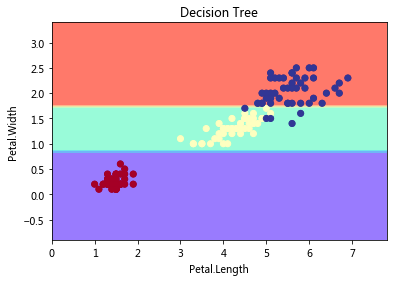

In [63]:
plt.contourf(xx,yy,Z,alpha=0.4,cmap=plt.cm.rainbow)
plt.scatter(X[:,0],X[:,1],c=y,alpha=1,cmap=plt.cm.RdYlBu)
plt.title('Decision Tree')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()
#plt.savefig('decision_tree.png')

## 邏輯式迴歸

In [64]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(iris.data, iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
predicted = clf.predict(iris.data)

In [68]:
sum(predicted == iris.target) / len(iris.target)

0.96

### 繪製決策邊界

In [69]:
X = iris.data[:,[2,3]]
y = iris.target

In [70]:
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
predicted2 = clf.predict(X)
sum(predicted2 == y) / len(y)

0.8733333333333333

In [71]:
import matplotlib.pyplot as plt
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))

In [72]:
plt.plot()
Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

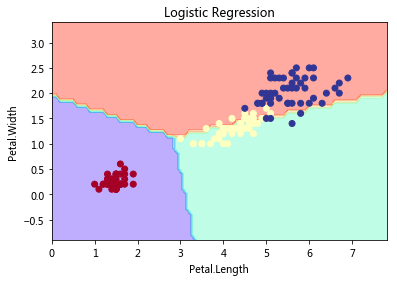

In [73]:
plt.contourf(xx,yy,Z,alpha=0.4,cmap=plt.cm.rainbow)
plt.scatter(X[:,0],X[:,1],c=y,alpha=1,cmap=plt.cm.RdYlBu)
plt.title('Logistic Regression')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()

## 支持向量機 (SVM)

In [80]:
from sklearn.svm import SVC
X=iris.data[0:100,[2,3]]
y=iris.target[0:100]

In [81]:
clf1=SVC(kernel="linear")
clf1.fit(X,y)

clf2=LogisticRegression()
clf2.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
def plot_estimator(estimator,X,y):
    x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
    
    Z=estimator.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.plot()
    plt.contourf(xx,yy,Z,alpha=0.4,cmap=plt.cm.RdYlBu)
    plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.brg)
    plt.xlabel('Petal.Length')
    plt.ylabel('Petal.Width')
    plt.show()

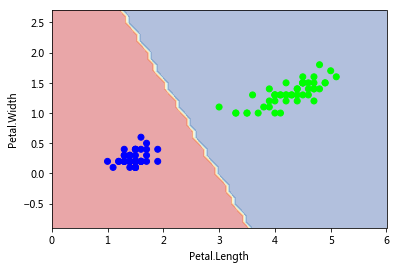

In [84]:
plot_estimator(clf1, X, y)

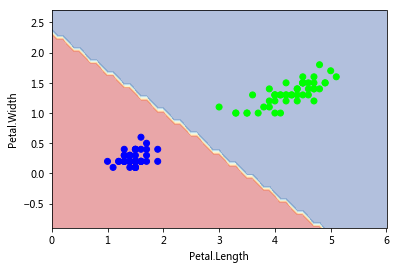

In [85]:
plot_estimator(clf2, X, y)

In [86]:
data=np.array([[-1,2,0],[-2,3,0],[-2,5,0],[-3,-4,0],[-0.1,2,0],[0.2,1,1],[0,1,1],[1,2,1],[1,1,1],[-0.4,0.5,1],[2,5,1]])
X=data[:,:2]
Y=data[:,2]

### 調整正則項 (Regularization Term)

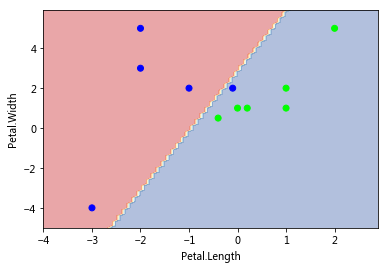

In [87]:
# Large Margin
clf=SVC(C=1.0,kernel='linear')
clf.fit(X,Y)
plot_estimator(clf,X,Y)

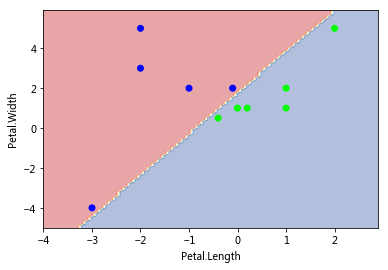

In [88]:
# Narrow Margin
clf=SVC(C=100000,kernel='linear')
clf.fit(X,Y)
plot_estimator(clf,X,Y)

### 調整Kernel

In [89]:
X=iris.data[:,[2,3]]
y=iris.target

In [90]:
clf1=SVC(kernel="rbf")
clf1.fit(X,y)

clf2=SVC(kernel="poly")
clf2.fit(X,y)

clf3=SVC(kernel="linear")
clf3.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['title', 'clf', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


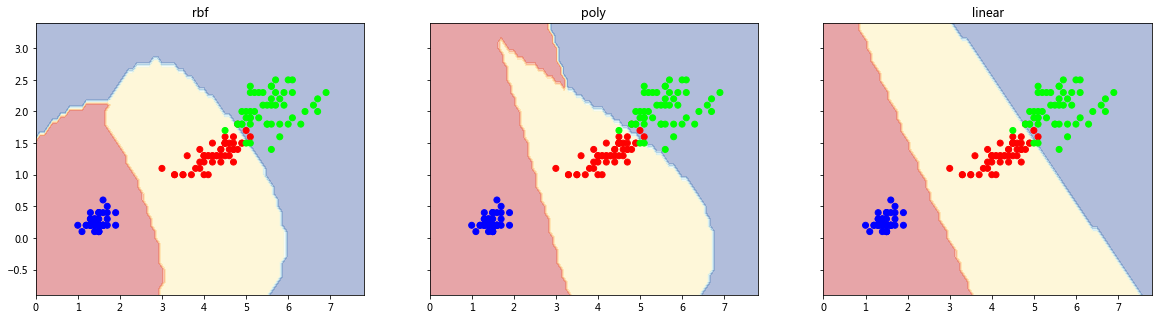

In [92]:
%pylab inline
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
f,axarr=plt.subplots(1,3,sharex='col',sharey='row',figsize=(20,5))
for idx,clf,title in zip([0,1,2],[clf1,clf2,clf3],['rbf','poly','linear']):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    axarr[idx].contourf(xx,yy,Z,alpha=0.4,cmap=plt.cm.RdYlBu)
    axarr[idx].scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.brg)
    axarr[idx].set_title(title)

In [94]:
sum(clf1.predict(X) == y) / len(y)

0.9666666666666667

In [96]:
sum(clf2.predict(X) == y) / len(y)

0.96

In [97]:
sum(clf3.predict(X) == y) / len(y)

0.9666666666666667

## 建立隨機森林

In [120]:
def plot_estimator(estimator,X,y):
    x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
    
    Z=estimator.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.plot()
    plt.contourf(xx,yy,Z,alpha=0.4,cmap=plt.cm.RdYlBu)
    plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.brg)
    plt.xlabel('Sepal.Length')
    plt.ylabel('Sepal.Width')
    plt.show()

In [121]:
from sklearn.ensemble import RandomForestClassifier
X=iris.data[:,[0,1]]
y=iris.target
clf=RandomForestClassifier(n_estimators=100,criterion="entropy")
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

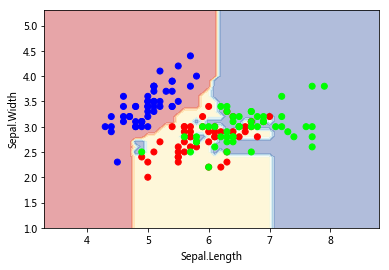

In [122]:
plot_estimator(clf,X,y)

In [123]:

clf1=RandomForestClassifier(n_estimators=1,criterion="entropy")
clf1.fit(X,y)

clf10=RandomForestClassifier(n_estimators=10,criterion="entropy")
clf10.fit(X,y)

clf100=RandomForestClassifier(n_estimators=100,criterion="entropy")
clf100.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

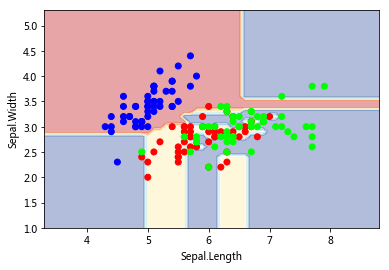

In [124]:
plot_estimator(clf1, X,y)

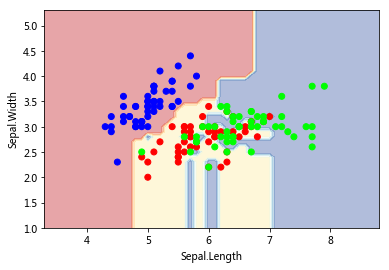

In [125]:
plot_estimator(clf10, X,y)

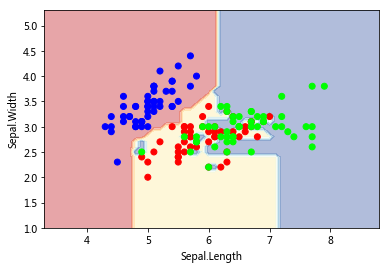

In [126]:
plot_estimator(clf100, X,y)

In [127]:
predicted = clf1.predict(X)
sum(predicted == y) / len(y)

0.8533333333333334

In [128]:
predicted = clf10.predict(X)
sum(predicted == y) / len(y)

0.9133333333333333

In [129]:
predicted = clf100.predict(X)
sum(predicted == y) / len(y)

0.9266666666666666

## 比較不同分類器

In [135]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
clf1=SVC(kernel="rbf")
clf1.fit(X,y)
clf2=DecisionTreeClassifier()
clf2.fit(X,y)
clf3=RandomForestClassifier(n_estimators=100,criterion="entropy")
clf3.fit(X,y)
clf4=LogisticRegression()
clf4.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

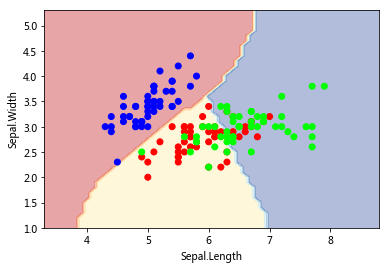

0.8266666666666667

In [136]:
plot_estimator(clf1, X,y)
predicted = clf1.predict(X)
sum(predicted == y) / len(y)

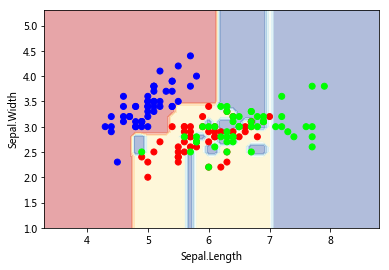

0.9266666666666666

In [137]:
plot_estimator(clf2, X,y)
predicted = clf2.predict(X)
sum(predicted == y) / len(y)

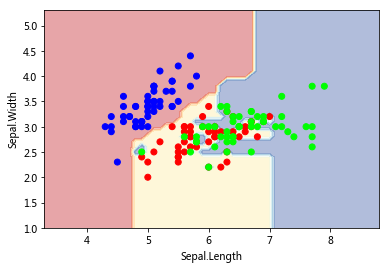

0.9266666666666666

In [138]:
plot_estimator(clf3, X,y)
predicted = clf3.predict(X)
sum(predicted == y) / len(y)

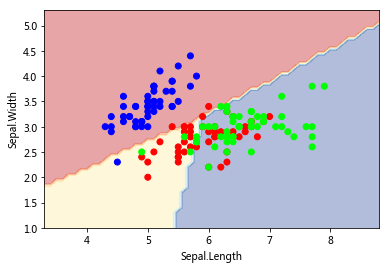

0.7666666666666667

In [139]:
plot_estimator(clf4, X,y)
predicted = clf4.predict(X)
sum(predicted == y) / len(y)

## 建立類神經網路

In [140]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np 
digits=load_digits()

In [144]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [149]:
digits.images.shape

(1797, 8, 8)

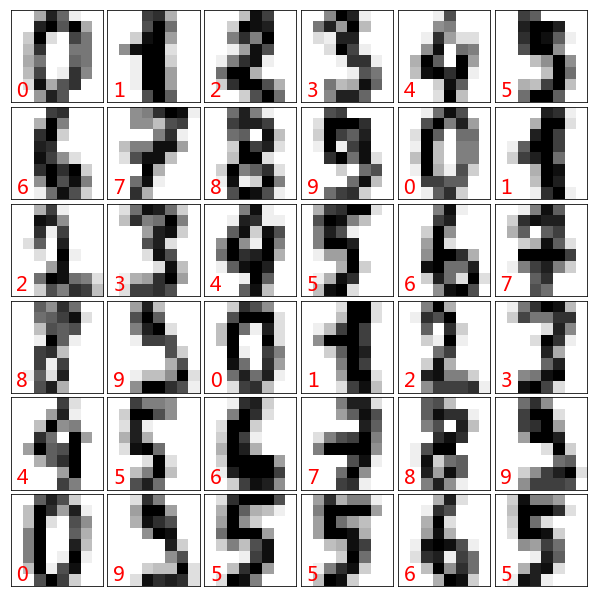

In [151]:
fig=plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
for i in range(36):
    ax=fig.add_subplot(6,6,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0,7,str(digits.target[i]),color="red",fontsize=20)

In [152]:
scaler=StandardScaler()
scaler.fit(digits.data)
X_scaled=scaler.transform(digits.data)

In [166]:
mlp=MLPClassifier(hidden_layer_sizes=(30,30,30),activation='logistic',max_iter=1000)
mlp.fit(X_scaled,digits.target)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [167]:
predicted = mlp.predict(X_scaled)

In [168]:
sum(digits.target == predicted) / len(predicted)

1.0

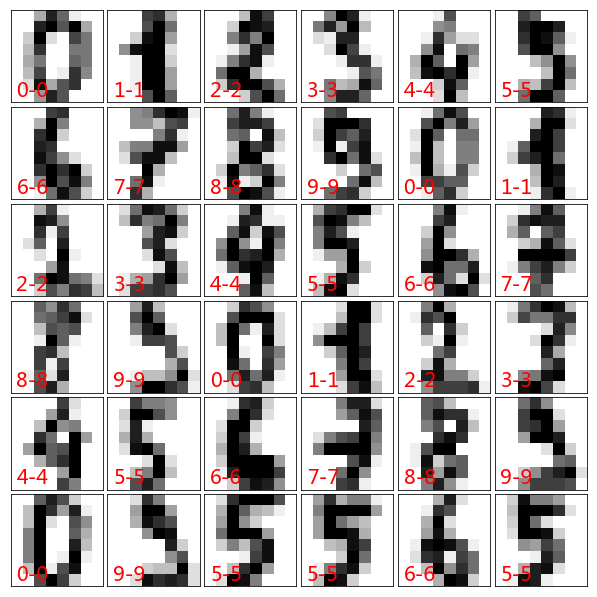

In [169]:
fig=plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
for i in range(36):
    ax=fig.add_subplot(6,6,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0,7,str('{}-{}'.format(digits.target[i],predicted[i])),color="red",fontsize=20)

## Tesseract
- 下載 tesseract
- http://digi.bib.uni-mannheim.de/tesseract/tesseract-ocr-setup-4.00.00dev.exe

- 將tesseract 所在路徑設到環境變數中 (電腦 -> 右鍵 -> 進階系統設定 -> 環境變數 -> PATH 中 加入 ;C:\Program Files (x86)\Tesseract-OCR)
- C:\Program Files (x86)\Tesseract-OCR
- 安裝 pytesseract => ! pip install pytesseract



In [170]:
! pip install pytesseract

  Running setup.py bdist_wheel for pytesseract: started
  Running setup.py bdist_wheel for pytesseract: finished with status 'done'
  Stored in directory: C:\Users\USER\AppData\Local\pip\Cache\wheels\30\cb\34\3596880eb7e3a340011ec931d540dc7c944a30d94bb3ba3af7
Successfully built pytesseract


In [171]:
import requests
res = requests.get('https://gcis.nat.gov.tw/moeadsBF/kaptcha.jpg')
with open('kaptcha.jpg', 'wb') as f:
    f.write(res.content)

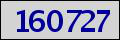

In [172]:
from PIL import Image
Image.open('kaptcha.jpg')

In [175]:
from PIL import Image
import pytesseract

pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe'

print(pytesseract.image_to_string(Image.open('kaptcha.jpg')))

160727


## 模型評估

### 建立邏輯式迴歸模型

In [176]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris=load_iris()

clf=LogisticRegression()
clf.fit(iris.data,iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [178]:
predicted = clf.predict(iris.data)

### 產生準確度

In [182]:
sum(iris.target == predicted) / len(iris.target)

0.96

In [183]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.target,predicted)

0.96

### 建立混淆矩陣

In [184]:
from sklearn.metrics import confusion_matrix
m=confusion_matrix(iris.target,predicted)
m

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]], dtype=int64)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'clf', 'title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


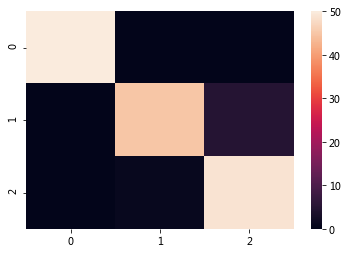

In [185]:
%pylab inline
import seaborn 
seaborn.heatmap(m)

### 計算F1 Score

In [186]:
from sklearn.metrics import classification_report
print(classification_report(iris.target,predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.90      0.94        50
          2       0.91      0.98      0.94        50

avg / total       0.96      0.96      0.96       150



### 建立決策樹模型

In [187]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris=load_iris()

clf=DecisionTreeClassifier()
clf.fit(iris.data,iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [188]:
predicted = clf.predict(iris.data)

In [189]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.target,predicted)

1.0

In [190]:
from sklearn.metrics import classification_report
print(classification_report(iris.target,predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50
          2       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       150



### 將資料分為訓練資料與測試資料集

### Hold-out 驗證

In [207]:
X = iris.data
y = iris.target

In [208]:
X.shape

(150, 4)

In [209]:
len(y)

150

In [210]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.33,random_state=123)

In [211]:
train_X.shape

(100, 4)

In [212]:
test_X.shape

(50, 4)

In [213]:
len(train_y)

100

In [214]:
len(test_y)

50

In [215]:
clf=DecisionTreeClassifier()
clf.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [216]:
tree.export_graphviz(clf, 'tree.dot')

In [217]:
from sklearn.metrics import accuracy_score



predicted=clf.predict(test_X)
print('test_data accuracy:',accuracy_score(test_y,predicted))


predicted2=clf.predict(train_X)
print('train_data accuracy:',accuracy_score(train_y,predicted2))

test_data accuracy: 0.94
train_data accuracy: 1.0


In [218]:
from sklearn.metrics import confusion_matrix
m=confusion_matrix(test_y,predicted)
print(m)


m2 = confusion_matrix(train_y,predicted2)
print(m2)

[[20  0  0]
 [ 0 11  0]
 [ 0  3 16]]
[[30  0  0]
 [ 0 39  0]
 [ 0  0 31]]


In [219]:
clf=DecisionTreeClassifier(max_depth=2)
clf.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [220]:
from sklearn.metrics import accuracy_score

predicted=clf.predict(test_X)
print('test_data accuracy:',accuracy_score(test_y,predicted))
m=confusion_matrix(test_y,predicted)
print(m)

test_data accuracy: 0.96
[[20  0  0]
 [ 0 11  0]
 [ 0  2 17]]


### K-Fold Cross Validation

In [221]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10)
for train,test in kf.split(X):
    train_X,test_X,train_y,test_y=X[train],X[test],y[train],y[test]
    clf=DecisionTreeClassifier()
    clf.fit(train_X,train_y)
    predicted=clf.predict(test_X)
    print(accuracy_score(test_y,predicted))

1.0
1.0
1.0
1.0
0.9333333333333333
0.8666666666666667
1.0
0.8666666666666667
0.7333333333333333
1.0


In [222]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(clf,X=iris.data,y=iris.target,cv=10)
acc

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ])

In [224]:
acc.mean()

0.9533333333333334

In [225]:
acc.std()

0.04268749491621898

### LeaveOneOut 驗證

In [227]:
from sklearn.model_selection import LeaveOneOut
res=[]
loo=LeaveOneOut()
for train,test in loo.split(X):
    train_X,test_X,train_y,test_y=X[train],X[test],y[train],y[test]
    clf=DecisionTreeClassifier()
    clf.fit(train_X,train_y)
    predicted=clf.predict(test_X)
    res.extend((predicted==test_y).tolist())
sum(res)

143

## 建立ROC 曲線

In [234]:
X = iris.data
y = iris.target
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X,y)
clf.predict_proba(X)[0:3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [236]:
X = iris.data[50:150,]
y = iris.target[50:150]

In [239]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
y=le.fit_transform(iris.target[50:150])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [243]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.33, random_state = 123)

In [247]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [248]:
probas_ = clf.predict_proba(test_X)

In [250]:
probas_[:,1]

array([0.        , 1.        , 1.        , 0.        , 0.57142857,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.57142857, 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        ])

In [269]:
from sklearn.metrics import confusion_matrix
import numpy as np
tpr_ary = [0]
fpr_ary = [0]
probas_ = clf.predict_proba(test_X)
for threshold in np.arange(0,1,0.1):
    predicted = (probas_[:,1] > threshold).astype(int)
    m = confusion_matrix(test_y, predicted)
    tp = m[0,0]
    fn = m[1,0]
    fp = m[0,1]
    tn = m[1,1]
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    
    #if (not np.isnan(tpr)) and (not np.isnan(fpr)):        
    tpr_ary.append(tpr)
    fpr_ary.append(fpr)

tpr_ary.append(1)
fpr_ary.append(1)

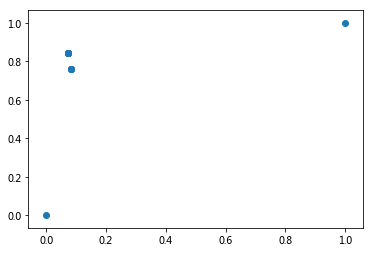

In [270]:
plt.scatter(x=fpr_ary, y = tpr_ary)

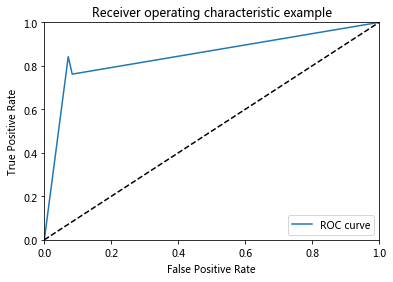

In [271]:
import matplotlib.pyplot as plt
plt.plot(fpr_ary, tpr_ary,label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [272]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(test_y,probas_[:,1])

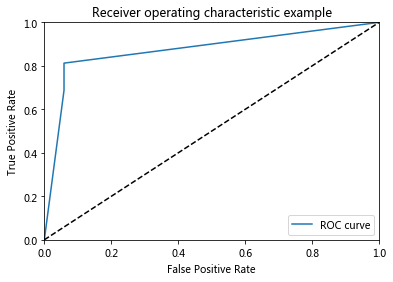

In [273]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr,label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## 求解AUC 

In [274]:
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the ROC curve : %f"%roc_auc)

Area under the ROC curve : 0.873162


## 使用ROC Curve 比較不同模型

In [275]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
clf1=DecisionTreeClassifier()
clf1.fit(train_X,train_y)

clf2=SVC(probability=True)
clf2.fit(train_X,train_y)

clf3=LogisticRegression()
clf3.fit(train_X,train_y)

clf4=RandomForestClassifier()
clf4.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

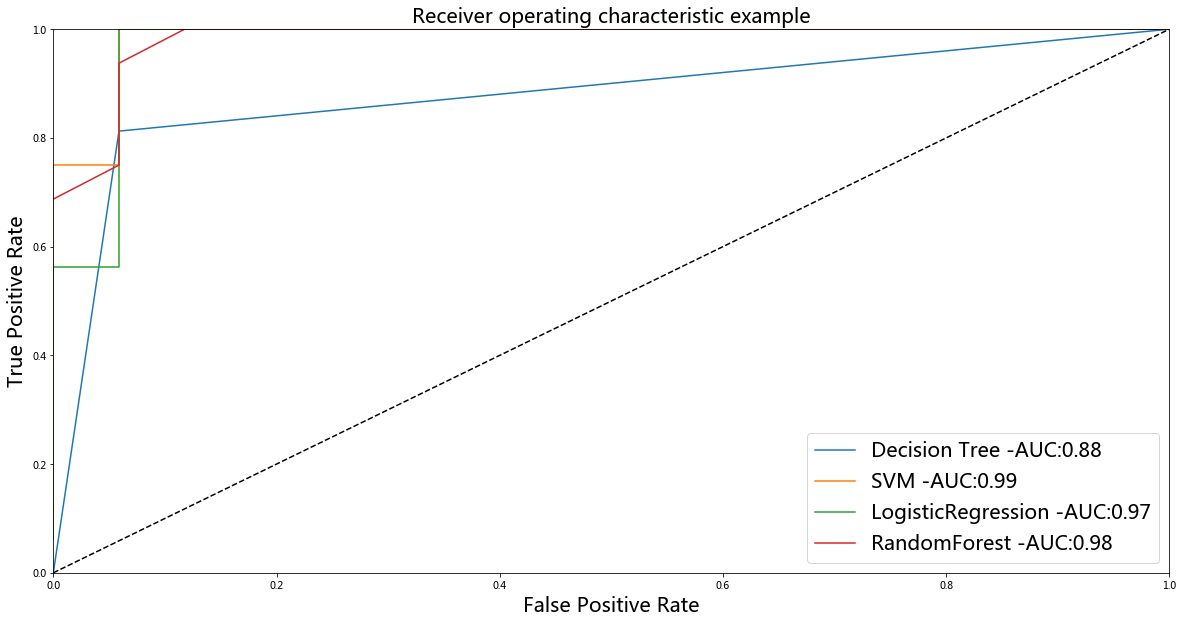

In [277]:
plt.figure(figsize=[20,10])

for clf,title in zip([clf1,clf2,clf3,clf4],['Decision Tree','SVM','LogisticRegression','RandomForest']):
    probas_=clf.fit(train_X,train_y).predict_proba(test_X)
    fpr,tpr,thresholds=roc_curve(test_y,probas_[:,1])
    plt.plot(fpr,tpr,label='%s -AUC:%.2f'%(title,auc(fpr,tpr)))
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver operating characteristic example',fontsize=20)
plt.legend(loc="lower right",fontsize=20)
plt.show()

## 儲存模型

In [279]:
import pandas
df=pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/salary.csv',index_col=0)
df.head()

,year,salary
1,2.4,6600
2,5.5,10100
3,3.3,7300
4,0.2,5000
5,1.5,6100


In [280]:
from sklearn.linear_model import LinearRegression

X = df[['year']]
Y = df[['salary']].values

regr=LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [281]:
regr.predict(5)

array([[8611.98058054]])

In [282]:
from sklearn.externals import joblib
joblib.dump(regr, 'fit.pickle')

['fit.pickle']

In [283]:
clf = joblib.load('fit.pickle')

In [287]:
clf.predict(5)[0][0]

8611.980580540385